In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import collections

# Train data

In [2]:
train_data = pd.read_csv('StanceDataset/train.csv')
train_data.head(5)

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos


In [3]:
print('total number of records', len(train_data))
train_label = collections.Counter(train_data['Stance'])
print('Stance bifurcation', train_label)

train_frq = train_data.groupby(['Target','Stance']).size().reset_index()
train_frq=train_frq.rename(columns={0:'Count'})

train_frq= pd.pivot_table(data=train_frq , index=['Target'], columns=['Stance'],values=['Count'])
train_frq.reset_index(inplace=True)
train_frq.columns =['Target','AGAINST','FAVOR','NONE']
train_frq

total number of records 2914
Stance bifurcation Counter({'AGAINST': 1395, 'NONE': 766, 'FAVOR': 753})


,Target,AGAINST,FAVOR,NONE
0,Atheism,304,92,117
1,Climate Change is a Real Concern,15,212,168
2,Feminist Movement,328,210,126
3,Hillary Clinton,393,118,178
4,Legalization of Abortion,355,121,177


# Test data

In [4]:
test_data = pd.read_csv('StanceDataset/test.csv')
test_data.head(5)

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,He who exalts himself shall be humbled; a...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
1,RT @prayerbullets: I remove Nehushtan -previou...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,other
2,@Brainman365 @heidtjj @BenjaminLives I have so...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
3,#God is utterly powerless without Human interv...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@David_Cameron Miracles of #Multiculturalism...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,neg


In [5]:
print('total number of records', len(test_data))
test_label = collections.Counter(test_data['Stance'])
print('Stance bifurcation', test_label)

test_frq = test_data.groupby(['Target','Stance']).size().reset_index()
test_frq=test_frq.rename(columns={0:'Count'})

test_frq= pd.pivot_table(data=test_frq , index=['Target'], columns=['Stance'],values=['Count'])
test_frq.reset_index(inplace=True)
test_frq.columns =['Target','AGAINST','FAVOR','NONE']
test_frq

total number of records 1956
Stance bifurcation Counter({'AGAINST': 1014, 'NONE': 490, 'FAVOR': 452})


,Target,AGAINST,FAVOR,NONE
0,Atheism,160,32,28
1,Climate Change is a Real Concern,11,123,35
2,Donald Trump,299,148,260
3,Feminist Movement,183,58,44
4,Hillary Clinton,172,45,78
5,Legalization of Abortion,189,46,45


<AxesSubplot:title={'center':'Test Set'}, xlabel='Target'>

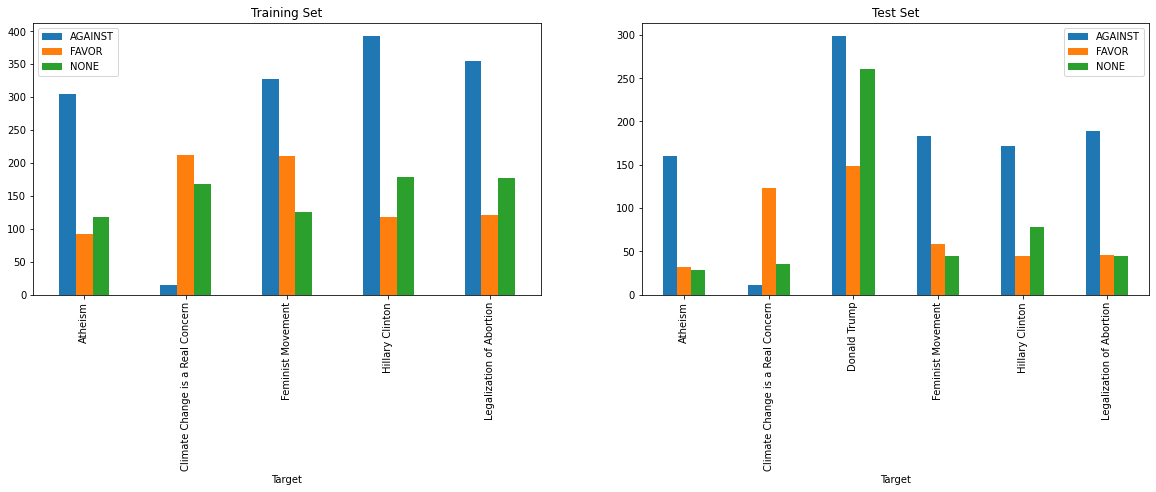

In [6]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

train_frq.plot(x='Target', y=['AGAINST','FAVOR','NONE'], kind='bar', ax=axes[0], title='Training Set')
test_frq.plot(x="Target", y=["AGAINST", "FAVOR",'NONE'], kind="bar", ax=axes[1], title='Test Set')


In [24]:
train_frq = train_data.groupby(['Stance']).size().reset_index()
train_frq=train_frq.rename(columns={0:'Count'})

train_frq['dataset'] ='Train'

test_frq = test_data.groupby(['Stance']).size().reset_index()
test_frq=test_frq.rename(columns={0:'Count'})

test_frq['dataset'] ='Test'

frames=[train_frq, test_frq]
db_final = pd.concat(frames)

data_frq= pd.pivot_table(data=db_final , index=['Stance'], columns=['dataset'],values=['Count'])
data_frq.reset_index(inplace=True)
data_frq.columns =['Stance','Train','Test']
data_frq


,Stance,Train,Test
0,AGAINST,1014,1395
1,FAVOR,452,753
2,NONE,490,766


<AxesSubplot:title={'center':'Complete Set'}, xlabel='Stance'>

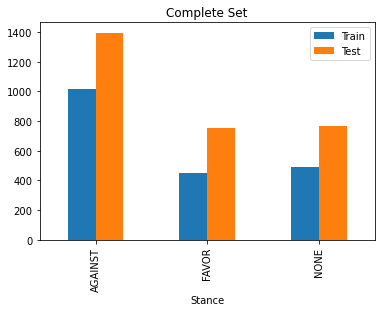

In [29]:
data_frq.plot(x='Stance', y=['Train','Test'], kind='bar', title='Complete Set')
